# Read in csv for route 4

In [2]:
#Read into a dataframe a CSV dataset
#Timestamp micro since 1970 01 01 00:00:00 GMT'
#Line ID
#Direction
#Journey Pattern ID
#Time Frame (The start date of the production time table - in Dublin the production time table starts at 6am and ends at 3am)
#Vehicle Journey ID (A given run on the journey pattern)
#Operator (Bus operator, not the driver)
#Congestion [0=no,1=yes]
#Lon WGS84'Lat WGS84'
#Delay (seconds, negative if bus is ahead of schedule)
#Block ID (a section ID of the journey pattern)
#Vehicle ID
#Stop ID
#At Stop [0=no,1=yes]

# the ultimate target feature: delay per stop

# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

# Read csv file into a dataframe.
df = pd.read_csv('route4.csv')
df.head()

/Users/user/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
0,8,1356998427000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
1,20,1356998427000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
2,44,1356998485000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
3,46,1356998485000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
4,67,1356998546000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1


In [3]:
df.shape

(689030, 16)

In [4]:
#update the timestamp:

df["Time"] = pd.to_datetime(df['Timestamp']*1000, unit="ns")
df.head(5)


,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time
0,8,1356998427000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:00:27
1,20,1356998427000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:00:27
2,44,1356998485000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:01:25
3,46,1356998485000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:01:25
4,67,1356998546000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:02:26


# Merge bus stop info

In [5]:
df_bus_stop = pd.read_csv('busstopinfo.csv', encoding='latin-1')
df_bus_stop

,stopid,displaystopid,shortname,fullname,latitude,longitude,lastupdated,OperatorName,route1,route2,...,route26,route27,route28,route29,route30,route31,route32,route33,route34,route35
0,2,2,Parnell Square,Parnell Square,53.352241,-6.263695,12/06/2017 08:09,bac,38,38A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3,Parnell Square,Parnell Square,53.352307,-6.263783,12/06/2017 08:09,bac,120,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4,Parnell Square,Parnell Square,53.352567,-6.264166,12/06/2017 08:09,bac,7,7B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,6,Parnell Square,Parnell Square,53.352744,-6.264443,12/06/2017 08:09,bac,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,7,Parnell Square,Parnell Square,53.352836,-6.264562,12/06/2017 08:09,bac,40,40B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,8,Parnell Square,Parnell Square,53.353281,-6.265155,12/06/2017 08:09,bac,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,10,Parnell Square,Parnell Square,53.353387,-6.265384,12/06/2017 08:09,bac,16C,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,11,Dorset St,Dorset St,53.357094,-6.264367,12/06/2017 08:09,bac,40B,40D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,12,Dorset St,Dorset St,53.356789,-6.264623,12/06/2017 08:09,bac,122,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,14,Dorset St,Dorset St,53.358537,-6.262724,12/06/2017 08:09,bac,44,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bus_stop_route4 = df_bus_stop.loc[(df_bus_stop.route1 == '4')]
df_bus_stop_route4

,stopid,displaystopid,shortname,fullname,latitude,longitude,lastupdated,OperatorName,route1,route2,...,route26,route27,route28,route29,route30,route31,route32,route33,route34,route35
3,6,6,Parnell Square,Parnell Square,53.352744,-6.264443,12/06/2017 08:09,bac,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,113,113,Ballymun Road,Ballymun Road,53.392269,-6.263688,12/06/2017 08:09,bac,4,42D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,115,115,Ballymun Road,Ballymun Road,53.387935,-6.265037,12/06/2017 08:09,bac,4,70D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,127,127,Ballymun Road,Ballymun Road,53.399107,-6.263668,12/06/2017 08:09,bac,4,17A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,147,147,Mobhi Road,Mobhi Road,53.372481,-6.265828,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,149,149,Mobhi Road,Mobhi Road,53.373138,-6.265969,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,185,185,Botanic Rd,Botanic Rd,53.368094,-6.270019,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,195,195,Phibsboro Road,Phibsboro Road,53.355000,-6.273500,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,197,197,Phibsboro Road,Phibsboro Road,53.358949,-6.273225,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,199,199,Phibsboro Road,Phibsboro Road,53.363615,-6.272286,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So there are 42 official Route 4 stops.

In [7]:
df_bus_stop_route4 = df_bus_stop_route4[['stopid', 'fullname']]
df_bus_stop_route4

,stopid,fullname
3,6,Parnell Square
88,113,Ballymun Road
90,115,Ballymun Road
97,127,Ballymun Road
114,147,Mobhi Road
116,149,Mobhi Road
143,185,Botanic Rd
153,195,Phibsboro Road
155,197,Phibsboro Road
157,199,Phibsboro Road


In [8]:
df_bus_stop_route4 = df_bus_stop_route4.rename(columns={'stopid': 'Stop_ID'})

In [9]:
df = pd.merge(df, df_bus_stop_route4, on=['Stop_ID'])
df.shape

(281740, 18)

# Dropping duplicates

In [10]:
df=df.drop_duplicates(keep='first')
df.shape

(277609, 18)

There are no duplicates after merging on Stop_ID

In [11]:
#df.T.drop_duplicates().T
#df.shape

In [12]:
df.describe()

,Unnamed: 0,Timestamp,LineID,Direction,Vehicle_Journey_ID,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,At_Stop
count,2.776090e+05,2.776090e+05,277609.0,277609.0,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000
mean,8.108003e+05,1.358304e+15,4.0,0.0,14691.484199,0.001293,-6.226622,53.346136,-106.515805,13059.214381,41919.514277,0.297109
std,4.792244e+05,7.384720e+11,0.0,0.0,90437.362375,0.035938,0.049220,0.048252,414.392095,85520.175041,2815.298232,0.456986
min,2.000000e+00,1.356998e+15,4.0,0.0,4229.000000,0.000000,-6.312333,53.285683,-2516.000000,4001.000000,33069.000000,0.000000
25%,4.113210e+05,1.357671e+15,4.0,0.0,4569.000000,0.000000,-6.268298,53.296730,-296.000000,4003.000000,43033.000000,0.000000
50%,7.518540e+05,1.358318e+15,4.0,0.0,4900.000000,0.000000,-6.258871,53.347176,-12.000000,4005.000000,43037.000000,0.000000
75%,1.229562e+06,1.358935e+15,4.0,0.0,4945.000000,0.000000,-6.170437,53.397099,35.000000,4009.000000,43042.000000,1.000000
max,1.733537e+06,1.359631e+15,4.0,0.0,999254.000000,1.000000,-6.134333,53.418999,5550.000000,822025.000000,43054.000000,1.000000


# Checking for constant columns - cardinality = 1

In [13]:
for column in df.columns:
    print(column + "," + str(len(df[column].unique())))

Unnamed: 0,256181
Timestamp,214566
LineID,1
Direction,1
Journey_Pattern_ID,7
Timeframe,32
Vehicle_Journey_ID,536
Operator,4
Congestion,2
Lon,17683
Lat,15579
Delay,3333
Block_ID,42
Vehicle_ID,114
Stop_ID,37
At_Stop,2
Time,214566
fullname,20


The direction is constant, the line ID is only constant due to a filter.

In [16]:
df.drop('Direction', axis=1)

,Unnamed: 0,Timestamp,LineID,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
0,8,1356998427000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:00:27,Monkstown Ave
1,44,1356998485000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:01:25,Monkstown Ave
2,68,1356998546000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:02:26,Monkstown Ave
3,90,1356998597000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:03:17,Monkstown Ave
4,91,1356998607000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:03:27,Monkstown Ave
5,129,1356998669000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:04:29,Monkstown Ave
6,150,1356998726000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:05:26,Monkstown Ave
7,174,1356998786000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:06:26,Monkstown Ave
8,191,1356998847000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:07:27,Monkstown Ave
9,219,1356998909000000,4.0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:08:29,Monkstown Ave


# Notes on missing values

In [164]:
df.isnull().sum()

Unnamed: 0            0
Timestamp             0
LineID                0
Direction             0
Journey_Pattern_ID    2
Timeframe             0
Vehicle_Journey_ID    0
Operator              0
Congestion            0
Lon                   0
Lat                   0
Delay                 0
Block_ID              0
Vehicle_ID            0
Stop_ID               0
At_Stop               0
Time                  0
fullname              0
dtype: int64

It does not appear that any feature has so many missing values that the feature should be dropped right now. So there is no missing value work at the outset. 

# Looking at the data to check what some features represent by checking their unique values

In [163]:
df.Operator.unique()

array(['HN', 'SL', 'D1', 'D2'], dtype=object)

In [165]:
df.Timeframe.unique()

array(['2012-12-31', '2013-01-01', '2013-01-02', '2013-01-03',
       '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
       '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
       '2013-01-12', '2013-01-13', '2013-01-14', '2013-01-15',
       '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-19',
       '2013-01-20', '2013-01-21', '2013-01-22', '2013-01-23',
       '2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27',
       '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31'], dtype=object)

Timeframe is merely date. 

In [166]:
df.Block_ID.unique()

array([  4001,   4002,   4003,   4004,   4005,   4007,   4008,   4009,
         4010,   4011,   4006,   4012,   4070, 822025,   4075,  40312,
        40507,   4090,   4085,   4091,   4099,   4508,   4501,   4069,
         4068,   4018,   4071,   4312,   4507,   4014,   4021,   4020,
         4072,   4076,   4015,   4013,   4016,   4017,   4019,   4023,
         4022,   4024])

In [167]:
df.Journey_Pattern_ID.unique()

array(['null', '00040001', '00041002', '00041001', '00040002', '033X1001',
       nan], dtype=object)

So journey pattern ID relates to Block ID

Issue is equating the number of journey patters to either daily schedules (weekday, sat, sun, BH perhaps?), directional schedules or variations of the bus route (4A for example). 

In [168]:
df.Stop_ID.unique()

array(['7226', '281', '324', '7113', '127', '113', '115', '147', '185',
       '7457', '273', '408', '410', '412', '414', '416', '418', '420',
       '424', '426', '428', '6334', '3116', '6085', '7330', '3162', '3164',
       '6', '195', '197', '199', '201', '149', '322', '332', '4705', '422'], dtype=object)

In [170]:
df['Block_ID'].groupby(df['Journey_Pattern_ID']).count().T

Journey_Pattern_ID
00040001    131785
00040002       871
00041001     98908
00041002      1041
033X1001         7
null         44995
Name: Block_ID, dtype: int64


To find out: Why are there 242 unique stop IDs when the number 4 does not have 242 stops?

Why are we seeing 'nan' here when we have converted to string - what is this and what does this feature really represent:

Is it days of the week schedules (sat/BH/sun/weekday etc)? 
Is it variants on the routes?

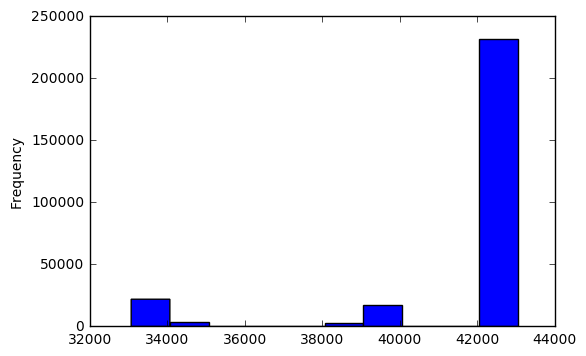

In [171]:
df['Vehicle_ID'].plot(kind='hist')

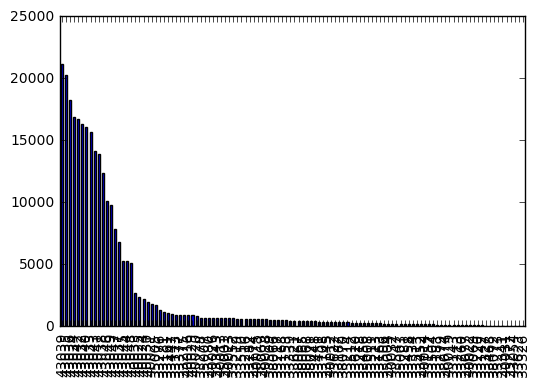

In [172]:
df['Vehicle_ID'].value_counts().plot(kind='bar')

Perhaps these do represent direction given there are no variants on the route (A/B etc) decommissioned 4A in 2010 according to this http://www.boards.ie/vbulletin/showthread.php?t=2056040487

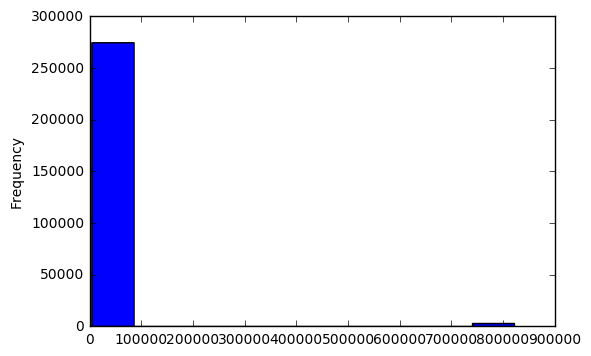

In [173]:
df['Block_ID'].plot(kind='hist')

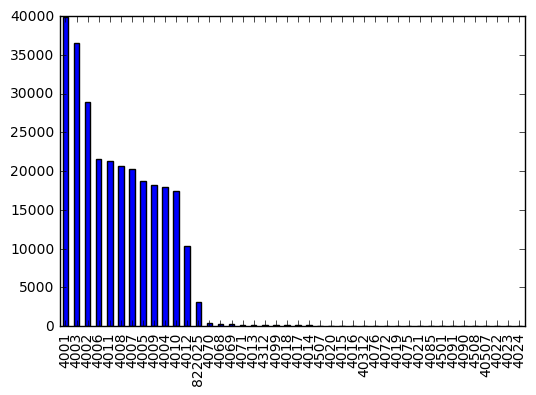

In [174]:
df['Block_ID'].value_counts().plot(kind='bar')

# Dropping constant columns

Direction is a constant - that is unexpected
Line is constant as we filtered for line

In [175]:
df = df.drop('LineID', 1)
df = df.drop('Direction', 1)
df.shape

(277609, 16)

# Group continuous and categorical data 

In [160]:
#as we are seeing 'mixed types' warning for column 14 checking the data types:
df.dtypes

Unnamed: 0                     int64
Timestamp                      int64
LineID                       float64
Direction                      int64
Journey_Pattern_ID            object
Timeframe                     object
Vehicle_Journey_ID             int64
Operator                      object
Congestion                     int64
Lon                          float64
Lat                          float64
Delay                          int64
Block_ID                       int64
Vehicle_ID                     int64
Stop_ID                       object
At_Stop                        int64
Time                  datetime64[ns]
fullname                      object
dtype: object

In [169]:
df.select_dtypes(['object']).describe().T

,count,unique,top,freq
Journey_Pattern_ID,277607,6,00040001,131785
Timeframe,277609,32,2013-01-02,12446
Operator,277609,4,HN,276751
Stop_ID,277609,37,7330,34054
fullname,277609,20,Monkstown Ave,59947


In [176]:
#grouping continuous and categorical data fields

df['Congestion'] = df['Congestion'].astype('category')
df['Operator'] = df['Operator'].astype('category')

# Looking into the journey pattern ID in order to establish what it means

# First run a given run on a route and investigate journey pattern ID vs other features

# Journey Pattern ID 00041001 - southbound bus - appears to be peak schedule

In [22]:
df_subset = df.loc[(df.Vehicle_ID == 43042) & (df.Vehicle_Journey_ID == 4915) & (df.Timeframe == '2013-01-31')]
df_subset

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
26296,326731,1359622754000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.153700,53.288532,-49,4010,43042,7226,1,2013-01-31 08:59:14,Monkstown Ave
26297,327474,1359622775000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.153650,53.288532,-49,4010,43042,7226,1,2013-01-31 08:59:35,Monkstown Ave
26298,328171,1359622794000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.151467,53.289318,-49,4010,43042,7226,1,2013-01-31 08:59:54,Monkstown Ave
64732,130469,1359617452000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.275600,53.418068,0,4010,43042,324,0,2013-01-31 07:30:52,Harristown
64733,131102,1359617471000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.275600,53.418068,0,4010,43042,324,0,2013-01-31 07:31:11,Harristown
64736,131701,1359617491000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.266103,53.417065,0,4010,43042,324,0,2013-01-31 07:31:31,Harristown
64738,133121,1359617532000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.265911,53.416904,48,4010,43042,324,0,2013-01-31 07:32:12,Harristown
64741,133764,1359617551000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.278516,53.417789,148,4010,43042,324,0,2013-01-31 07:32:31,Harristown
71502,138826,1359617692000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.264970,53.402534,-10,4010,43042,7113,1,2013-01-31 07:34:52,Ballymun Road
71503,139486,1359617712000000,4.0,0,00040001,2013-01-31,4915,HN,0,-6.264970,53.402534,9,4010,43042,7113,1,2013-01-31 07:35:12,Ballymun Road


In [23]:
df_subset.shape

(113, 18)

In [24]:
for column in df_subset.columns:
    print(column + "," + str(len(df_subset[column].unique())))

Unnamed: 0,113
Timestamp,113
LineID,1
Direction,1
Journey_Pattern_ID,1
Timeframe,1
Vehicle_Journey_ID,1
Operator,1
Congestion,1
Lon,95
Lat,94
Delay,60
Block_ID,1
Vehicle_ID,1
Stop_ID,24
At_Stop,2
Time,113
fullname,17


Comments: timestamps are out of order, this subset starts later than it finishes. 
The delay of being 49 seconds ahead of schedule is not in line with the 1 hour schedule from Harristown to Monkstown. So the delay is against a schedule of 1 hour 30 minutes. This is a peak time - Thursday 31/1/2013. 
Block ID: 4010 - stays constant
Journey pattern ID: 00040001
This is a Southbound bus.

In [26]:
df_subset1 = df.loc[(df.Vehicle_ID == 33219) & (df.Vehicle_Journey_ID == 963581) & (df.Timeframe == '2013-01-31')]
df_subset1

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
65013,437254,1359626572000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.265333,53.412716,0,4069,33219,324,0,2013-01-31 10:02:52,Harristown
65016,437917,1359626591000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.265617,53.410217,0,4069,33219,324,0,2013-01-31 10:03:11,Harristown
65017,438079,1359626602000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.265617,53.410217,0,4069,33219,324,0,2013-01-31 10:03:22,Harristown
71532,441688,1359626709000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264970,53.402534,-174,4069,33219,7113,1,2013-01-31 10:05:09,Ballymun Road
71533,442427,1359626731000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264970,53.402534,-154,4069,33219,7113,1,2013-01-31 10:05:31,Ballymun Road
71534,443161,1359626761000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264970,53.402534,-134,4069,33219,7113,1,2013-01-31 10:06:01,Ballymun Road
71535,443739,1359626774000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264970,53.402534,-114,4069,33219,7113,1,2013-01-31 10:06:14,Ballymun Road
71536,444194,1359626791000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264970,53.402534,-94,4069,33219,7113,1,2013-01-31 10:06:31,Ballymun Road
71537,444783,1359626810000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264750,53.401558,-124,4069,33219,7113,0,2013-01-31 10:06:50,Ballymun Road
71538,445418,1359626829000000,4.0,0,00040001,2013-01-31,963581,HN,0,-6.264696,53.401478,-124,4069,33219,7113,0,2013-01-31 10:07:09,Ballymun Road


In [27]:
for column in df_subset1.columns:
    print(column + "," + str(len(df_subset1[column].unique())))

Unnamed: 0,79
Timestamp,79
LineID,1
Direction,1
Journey_Pattern_ID,1
Timeframe,1
Vehicle_Journey_ID,1
Operator,1
Congestion,1
Lon,67
Lat,67
Delay,49
Block_ID,1
Vehicle_ID,1
Stop_ID,21
At_Stop,2
Time,79
fullname,15


Comments: the timestamps are out of order again, so the bus in fact finishes at 11.08 on the Monkstown Link Road, not at 10:55 on Merrion Road.
The journey delay is 25 mins ahead of schedule for a trip that began at 10.02 and finished at 11.08 which indicates that the 1 hour published schedule is not right as we should be 6 minutes behind schedule - clearly the real expected time was an hour and a half here - that is the same as the example above but this is much later in the morning - should adhere to the offpeak schedule?
Again this is a southbound bus, so comparable to the journey above except for peak/offpeak.
Again block ID is constant but for the same jouney in same direction it is 4069 - so different. 
Therefore block ID cannot represent the section of the journey pattern as per the instructions given on Moodle. But journey pattern ID is still 00040001 - so that is a bus from Harristown to Monkstown.
Congestion is zero even though this is a peak time bus run so not clear what drives the congestion column. 

# Journey Pattern ID 00041002 - northbound bus - offpeak schedule

In [30]:
df_subset2 = df.loc[(df.Vehicle_ID == 43044) & (df.Vehicle_Journey_ID == 4599) & (df.Timeframe == '2013-01-03')]
df_subset2

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
27812,1697289,1357257250000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.264400,53.352783,-351,4012,43044,281,1,2013-01-03 23:54:10,O'Connell St
27813,1697394,1357257266000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.264367,53.352768,-351,4012,43044,281,1,2013-01-03 23:54:26,O'Connell St
27814,1697569,1357257287000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.264383,53.352749,-351,4012,43044,281,1,2013-01-03 23:54:47,O'Connell St
27815,1697732,1357257307000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.265750,53.353733,-351,4012,43044,281,1,2013-01-03 23:55:07,O'Connell St
27816,1697798,1357257311000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.265750,53.353733,-291,4012,43044,281,1,2013-01-03 23:55:11,O'Connell St
27817,1697969,1357257328000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.266716,53.354198,-291,4012,43044,281,1,2013-01-03 23:55:28,O'Connell St
27818,1698100,1357257348000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.267300,53.354416,-291,4012,43044,281,1,2013-01-03 23:55:48,O'Connell St
27819,1698265,1357257367000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.270667,53.355232,-291,4012,43044,281,1,2013-01-03 23:56:07,O'Connell St
27820,1698349,1357257371000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.270667,53.355232,-231,4012,43044,281,1,2013-01-03 23:56:11,O'Connell St
27821,1698476,1357257387000000,4.0,0,00041002,2013-01-03,4599,HN,0,-6.272833,53.354450,-231,4012,43044,281,1,2013-01-03 23:56:27,O'Connell St


In [31]:
for column in df_subset2.columns:
    print(column + "," + str(len(df_subset2[column].unique())))

Unnamed: 0,54
Timestamp,54
LineID,1
Direction,1
Journey_Pattern_ID,2
Timeframe,1
Vehicle_Journey_ID,1
Operator,1
Congestion,1
Lon,43
Lat,42
Delay,11
Block_ID,1
Vehicle_ID,1
Stop_ID,4
At_Stop,2
Time,54
fullname,4


Comments: again the timestamps are out of order. This is a Northbound bus. We lose it due to date filter near the end of it's trip. However it has travelled from Monkstown to O'Connell Street in 30 mins so it seems to be going on the offpeak scedule - 1 hour. 
The Northbound journey pattern ID is  	00041002.
The block ID is constant but unrelated to journey pattern at: 4012
HN - Harristown is the operator even though this but is travelling in the opposite direction - so operator is not reflective of starting bus depot - just the operator depot for this route it seems. Note this is the last run of a day (the 11.30pm bus).

# Journey Pattern ID 00041001 - northbound bus - offpeak schedule

In [38]:
df_subset3 = df.loc[(df.Vehicle_ID == 43039) & (df.Vehicle_Journey_ID == 4954) & (df.Timeframe == '2013-01-31')]
df_subset3

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
198375,511767,1359629257000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.157933,53.287117,47,4007,43039,7330,0,2013-01-31 10:47:37,Monkstown Ave
202314,516433,1359629401000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.166802,53.290535,-17,4007,43039,3162,0,2013-01-31 10:50:01,Rowan Pk
202315,517017,1359629413000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.166490,53.291435,-17,4007,43039,3162,0,2013-01-31 10:50:13,Rowan Pk
213341,519214,1359629499000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.171226,53.297417,-75,4007,43039,3164,0,2013-01-31 10:51:39,Stradbrook Rd
213342,519880,1359629511000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.175163,53.299015,-108,4007,43039,3164,0,2013-01-31 10:51:51,Stradbrook Rd
213343,520423,1359629533000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-129,4007,43039,3164,0,2013-01-31 10:52:13,Stradbrook Rd
213344,521102,1359629551000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-109,4007,43039,3164,0,2013-01-31 10:52:31,Stradbrook Rd
213345,521597,1359629572000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-89,4007,43039,3164,0,2013-01-31 10:52:52,Stradbrook Rd
213346,522106,1359629598000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.179827,53.300537,-89,4007,43039,3164,0,2013-01-31 10:53:18,Stradbrook Rd
278165,531546,1359629933000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.199994,53.310928,-70,4007,43039,4705,1,2013-01-31 10:58:53,Rock Road


This bus is going Northbound, but cuts off around 11AM.
Possibly one of the filters changes at 11AM.

In [40]:
df_subset3 = df.loc[ (df.Vehicle_Journey_ID == 4954) & (df.Timeframe == '2013-01-31')]
df_subset3

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
198375,511767,1359629257000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.157933,53.287117,47,4007,43039,7330,0,2013-01-31 10:47:37,Monkstown Ave
202314,516433,1359629401000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.166802,53.290535,-17,4007,43039,3162,0,2013-01-31 10:50:01,Rowan Pk
202315,517017,1359629413000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.166490,53.291435,-17,4007,43039,3162,0,2013-01-31 10:50:13,Rowan Pk
213341,519214,1359629499000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.171226,53.297417,-75,4007,43039,3164,0,2013-01-31 10:51:39,Stradbrook Rd
213342,519880,1359629511000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.175163,53.299015,-108,4007,43039,3164,0,2013-01-31 10:51:51,Stradbrook Rd
213343,520423,1359629533000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-129,4007,43039,3164,0,2013-01-31 10:52:13,Stradbrook Rd
213344,521102,1359629551000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-109,4007,43039,3164,0,2013-01-31 10:52:31,Stradbrook Rd
213345,521597,1359629572000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.178461,53.299938,-89,4007,43039,3164,0,2013-01-31 10:52:52,Stradbrook Rd
213346,522106,1359629598000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.179827,53.300537,-89,4007,43039,3164,0,2013-01-31 10:53:18,Stradbrook Rd
278165,531546,1359629933000000,4.0,0,00041001,2013-01-31,4954,HN,0,-6.199994,53.310928,-70,4007,43039,4705,1,2013-01-31 10:58:53,Rock Road


In [41]:
for column in df_subset3.columns:
    print(column + "," + str(len(df_subset3[column].unique())))

Unnamed: 0,13
Timestamp,13
LineID,1
Direction,1
Journey_Pattern_ID,1
Timeframe,1
Vehicle_Journey_ID,1
Operator,1
Congestion,1
Lon,10
Lat,10
Delay,9
Block_ID,1
Vehicle_ID,1
Stop_ID,4
At_Stop,2
Time,13
fullname,4


No, having tried without the filters this bus stops on Rock Road only 12 minutes into its journey. 
GPS tracking issues?
This bus is different on Journey Pattern ID to the previous northbound buses, its Journey Pattern ID is 00041001. Also as before the block ID is constant but not in line with other journeys in same area/direction 4007.

In [46]:
df_subset4 = df.loc[(df.Vehicle_ID == 43046) & (df.Vehicle_Journey_ID == 15476) & (df.Timeframe == '2013-01-01')]
df_subset4

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
26459,50159,1357033904000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.260931,53.350914,-676,4001,43046,281,1,2013-01-01 09:51:44,O'Connell St
26460,50346,1357033924000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.260931,53.350914,-657,4001,43046,281,1,2013-01-01 09:52:04,O'Connell St
26461,50596,1357033947000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.261570,53.352283,-681,4001,43046,281,0,2013-01-01 09:52:27,O'Connell St
26462,50832,1357033965000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.263148,53.351921,-701,4001,43046,281,0,2013-01-01 09:52:45,O'Connell St
163334,37280,1357032623000000,4.0,0,null,2013-01-01,15476,HN,0,-6.155856,53.287834,0,4001,43046,7330,0,2013-01-01 09:30:23,Monkstown Ave
163335,37479,1357032644000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.155856,53.287834,0,4001,43046,7330,0,2013-01-01 09:30:44,Monkstown Ave
163336,37646,1357032666000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.153664,53.288544,61,4001,43046,7330,0,2013-01-01 09:31:06,Monkstown Ave
198388,38735,1357032786000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.166533,53.291279,-90,4001,43046,3162,0,2013-01-01 09:33:06,Rowan Pk
202316,39330,1357032845000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.172278,53.297974,-146,4001,43046,3164,0,2013-01-01 09:34:05,Stradbrook Rd
202317,39491,1357032865000000,4.0,0,00041001,2013-01-01,15476,HN,0,-6.176355,53.299183,-165,4001,43046,3164,0,2013-01-01 09:34:25,Stradbrook Rd


This is a northbound bus - taking approx 58 minutes but coming in at only 19 seconds ahead of schedule. This was a bank holiday so this bus is travelling in non peak period. What is driving the different Journey Pattern ID _ possibly the non - peak period. It travels the same route with the same operator. The block ID is 4001 so it does tie into the Journey_Pattern_ID this time, unlike before. 


# Journey Pattern ID 00040002 - southbound bus - offpeak schedule

In [50]:
#df[df['Journey_Pattern_ID'] == '00040002']

In [48]:
df_subset5 = df.loc[(df.Vehicle_ID == 43047) & (df.Vehicle_Journey_ID == 4570) & (df.Timeframe == '2013-01-25')]
df_subset5

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
61589,1693077,1359156534000000,4.0,0,null,2013-01-25,4570,HN,0,-6.277417,53.417099,0,4003,43047,324,1,2013-01-25 23:28:54,Harristown
61590,1693382,1359156554000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.278478,53.417950,-51,4003,43047,324,0,2013-01-25 23:29:14,Harristown
61591,1693660,1359156575000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.278516,53.417789,-29,4003,43047,324,0,2013-01-25 23:29:35,Harristown
61592,1693923,1359156593000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.276501,53.418053,-29,4003,43047,324,0,2013-01-25 23:29:53,Harristown
61593,1694212,1359156614000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.276501,53.418053,-29,4003,43047,324,0,2013-01-25 23:30:14,Harristown
61594,1694470,1359156634000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.276501,53.418053,-29,4003,43047,324,0,2013-01-25 23:30:34,Harristown
61595,1694741,1359156653000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.278533,53.417900,-29,4003,43047,324,0,2013-01-25 23:30:53,Harristown
61596,1695018,1359156673000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.265967,53.417099,-29,4003,43047,324,0,2013-01-25 23:31:13,Harristown
70691,1697150,1359156835000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.264701,53.401489,-87,4003,43047,7113,0,2013-01-25 23:33:55,Ballymun Road
70692,1697428,1359156854000000,4.0,0,00040002,2013-01-25,4570,HN,0,-6.264701,53.401489,-66,4003,43047,7113,0,2013-01-25 23:34:14,Ballymun Road


Friday 25 Jan 2013 was a Friday but this is an offpeak bus.  It drops off at 11.51pm which is too early to be because of the date in the filter. It is a Southbound bus, last of the day. 

In [49]:
df_subset6 = df.loc[(df.Vehicle_ID == 43048) & (df.Vehicle_Journey_ID == 4570) & (df.Timeframe == '2013-01-02')]
df_subset6

,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time,fullname
42136,1667983,1357169403000000,4.0,0,null,2013-01-02,4570,HN,0,-6.278520,53.417770,0,4003,43048,324,0,2013-01-02 23:30:03,Harristown
42137,1668357,1357169429000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.278520,53.417770,0,4003,43048,324,0,2013-01-02 23:30:29,Harristown
42138,1668632,1357169450000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.278520,53.417770,0,4003,43048,324,0,2013-01-02 23:30:50,Harristown
42139,1668767,1357169462000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.272386,53.417824,0,4003,43048,324,0,2013-01-02 23:31:02,Harristown
42140,1668956,1357169470000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.272386,53.417824,0,4003,43048,324,0,2013-01-02 23:31:10,Harristown
42141,1669206,1357169493000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.272386,53.417824,0,4003,43048,324,0,2013-01-02 23:31:33,Harristown
42142,1669470,1357169512000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.278516,53.417789,107,4003,43048,324,0,2013-01-02 23:31:52,Harristown
42143,1669733,1357169530000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.278516,53.417789,107,4003,43048,324,0,2013-01-02 23:32:10,Harristown
42144,1670227,1357169570000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.278516,53.417789,107,4003,43048,324,0,2013-01-02 23:32:50,Harristown
42145,1670279,1357169584000000,4.0,0,00040002,2013-01-02,4570,HN,0,-6.270968,53.417747,107,4003,43048,324,0,2013-01-02 23:33:04,Harristown


This bus has same vehicle journey ID on a different date - but it is the last bus Southbound for the day. Again it drops off when it reaches Parnell Square, not making the full journey. 
